# Exploration

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

## Notes
This notebook is a distillation of my earlier work, reorganized and annotated to benefit presentation.

Before `first_encounters.csv` can be properly referenced from this notebook, it must be extraced from [`first_encounters.zip`](data/first_encounters.zip) and placed in the `/data` directory.

## Data source
Transparent Language provided me with access to a SQL dump of the _Which Is English?_ (WIE) database. Because the database contains proprietary information, it is not included in this project. However, data extracted for the purposes of exploration and analysis is shared here.

## Data exploration

### Items
WIE items are essentially binary choice questions, each having a _correct_ English word or phrase and an _incorrect_ one. For instance, the item may present a real English word next to a fake one:

- "apple" (correct)
- "ropple" (incorrect)

Or, two sentences might be provided, one with correct English grammar and one not:

- "I went to the store yesterday." (correct)
- "I goed to the store yesterday." (incorrect)

In the case of two phrases or sentences, part of the item text may be highlighted in order to help the player focus on the key words being contrasted. In that case, the data uses brackets to specify those key words:

- `I [went] to the store yesterday.`
- `I [goed] to the store yesterday.`

The best way to get a sense for the content of WIE items is to [visit the _Which Is English?_ application](https://whichisenglish.transparent.com/) and play a game.

### Database
The WIE database contains the following tables pertinent to our exploration:

- `testings_testitem`, a table describing all items, including whether or not they were "active" (enabled) in the system as of the dump. (An item might be marked "inactive" if it is found to be faulty, e.g. it contains a spelling mistake.)
- `testings_completedtestitem`, a table containing all interactions between users and items. An interaction results in a correct answer, an incorrect answer, or a timeout (WIE challenges are timed).

### `testings_testitem`

In [16]:
# Show some rows from the testings_testitem table
pd.read_csv('data/testings_testitem_head.txt', encoding='utf-8', sep='\t', index_col='id').head()

,created,correct,incorrect,points,percent_correct,times_exposed,correct_responses,active,explanation,total_feedback,language_id,type_id,challenge_rating,svn_revision,rowhash,est_rating,search_key,explanation_text,hint,total_comments
id,,,,,,,,,,,,,,,,,,,,
1,2011-10-24 10:25:40,a fair lady,a fare lady,10,90.18,1354,1221,1,"Fair and ""fare"" are often confused. ""Fair"" mea...",0,1,1,2,107898,6759FBABBA97DCDC1D50743257AAA593,935,fair,"Fair and ""fare"" are often confused. ""Fair"" mea...",NaN,0
2,2011-10-24 10:25:40,a [beautiful old wooden] cottage,a [wooden old beautiful] cottage,10,87.51,1657,1450,1,"When more than one adjective is used, an opini...",0,1,1,3,107898,AD69D5988F6B5078FE2888CA86E4792D,1045,NaN,"When more than one adjective is used, an opini...",NaN,0
3,2011-10-24 10:25:40,worked here [for] five years,worked here [since] five years,10,85.42,1790,1529,1,"For and ""since"" are often confused. ""For"" refe...",1,1,1,2,107898,91BCA8E81FE1210AE0AF6F84CE30605A,1203,for,"For and ""since"" are often confused. ""For"" refe...",NaN,0
4,2011-10-24 10:25:40,itsy bitsy spider,tinsy bitsy spider,10,80.56,1528,1231,1,Itsy bitsy spider is the name of a popular Eng...,0,1,1,2,107898,974A1DACF4CB22C0BB31243E3F1E9318,1552,itsy bitsy,Itsy bitsy spider is the name of a popular Eng...,NaN,0
5,2011-10-24 10:25:40,bank teller,bank windower,10,87.20,1266,1104,1,"Of these two, only ""bank teller"" is correct En...",0,1,1,2,0,C257A2FB0F4D2F6F2ECED0550EEA1418,1298,teller,"Of these two, only ""bank teller"" is correct En...",NaN,0


It's useful for us to be able to see which items are `active`; probably, we want to ignore inactive ones, as their interactions with users will have been tainted by spelling errors or whatever justified deactivating them.

We can also see there's a `language_id` field; Transparent Language has experimented with other languages besides English, but we're only interested in English items for the purposes of this project.

Lastly, we can see there's an `est_rating` field. Transparent Language used an undisclosed method to estimate the _relative difficulty_ of items in relation to each other. These numbers range roughly between 500 and 2000. However, we know the numbers are only estimates, and some of them aren't considered "stable" (i.e. Transparent Language anticipates they may change significantly upon future interactions with WIE players). To me, that means I'll still have to come up with my own way of using the data to rate user ability, but I'll have a set of numbers I can use to sanity-check my work. If my numbers at least correlate with the estimated ratings, I'll have more confidence in my methods. [See the Methodology notebook](Methodology.ipynb) for more on that.

### `testings_completedtestitem`

In [17]:
# Show some rows from the testings_completedtestitem table
pd.read_csv('data/testings_completedtestitem_head.txt', encoding='utf-8', sep='\t', index_col='id').head()

,created,item_id,test_id,user_id,completed,correct_response,points,timed_out,groupnum,rownum,percent_correct,total_items,ordernum,duration,est_rating,bonus,ui_blur,ui_mousemove,ui_keypress
id,,,,,,,,,,,,,,,,,,,
1,2011-10-24 10:25:43,379,1,680,2011-10-24 10:25:43,1,0,0,0,0,0.0,0,0,0,NaN,0,NaN,NaN,NaN
2,2011-10-24 10:25:43,88,1,680,2011-10-24 10:25:43,1,0,0,0,0,0.0,0,0,0,NaN,0,NaN,NaN,NaN
3,2011-10-24 10:25:43,587,1,680,2011-10-24 10:25:43,1,0,0,0,0,0.0,0,0,0,NaN,0,NaN,NaN,NaN
4,2011-10-24 10:25:43,181,1,680,2011-10-24 10:25:43,0,0,0,0,0,0.0,0,0,0,NaN,0,NaN,NaN,NaN
5,2011-10-24 10:25:43,343,1,680,2011-10-24 10:25:43,1,0,0,0,0,0.0,0,0,0,NaN,0,NaN,NaN,NaN


We can see there are a lot of miscellaneous columns used for various purposes within the _Which Is English?_ game, but the important stuff for us is here:

- `item_id`
- `user_id`
- `correct_response`
- `timed_out`

These are important because we're interested in exploring users' interactions with these items.

Unfortunately, we lack resolution on the exact order in which interactions happened. It's apparent that, however user interactions with items were logged, groups of them ended up with the same `created` timestamp. However, we can instead use the `id` field to infer the exact order of entries, which we'll relabel `ordinal` in our query (also, that's more convenient than parsing dates).

### Query
The first question we have to answer is: **What data is important to us?** Considering the objective of this project is to create a test capable of scoring a user based on their knowledge of English, we want to try to ignore noise resulting from byproducts of the WIE game experience:

- Repeat players may have memorized some items over multiple encounters
- Some players may have left their computers mid-game, resulting in meaningless timeouts

In order to account for this noise, we should query for the following: _For each user, show their first interaction with each item, unless that interaction was a timeout._ Using only the first interactions will eliminate the possibility of memorization playing a role in the data. Eliminating timeouts simplifies the data by restricting it only to deliberate answers (but as is mentioned in the [Improvement section of the README](README.md#Improvement), we're leaving some valuable data on the table by doing that).

The query I ended up using to extract [`first_encounters.csv`](data/first_encounters.csv) can be found at [`first_encounters.sql`](data/first_encounters.sql), and it's reproduced here:

## Data visualization

In [21]:
# Read in first encounters data
df_fe = pd.read_csv('data/first_encounters.csv', encoding='utf-8', index_col='ordinal')
df_fe.head()

C:\Users\emq\anaconda3\envs\wie\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,user_id,item_id,correct_response
ordinal,,,
1,680,379,1
3,680,587,1
5,680,343,1
6,680,29,1
7,680,104,1


First, let's look at the size of the data.

In [23]:
# How big is the data?
df_fe.shape

(8352574, 3)

In [24]:
# How many users are there?
df_fe['user_id'].nunique()

85802

In [25]:
# How many items are there?
df_fe['item_id'].nunique()

18081

Run some sanity checks:

In [37]:
# Confirm there are no duplicate user-item combos, since this should only contain first encounters
df_fe.groupby(['user_id', 'item_id']).count().shape

(8352574, 1)

In [32]:
# Confirm there are only 1's and 0's in the correct_response column
df_fe['correct_response'].unique()

array([1, 0], dtype=int64)

Good, it's got the same number of rows as the raw data, and the `correct_response` column is indeed binary. Now let's get an idea of what's in here.

### Users

In [45]:
# How many first encounters have our users had?
user_encounter_counts = df_fe.groupby('user_id')['item_id'].count()
user_encounter_counts.describe()

count    85802.000000
mean        97.347078
std        522.900077
min          1.000000
25%         14.000000
50%         24.000000
75%         54.000000
max      17944.000000
Name: item_id, dtype: float64

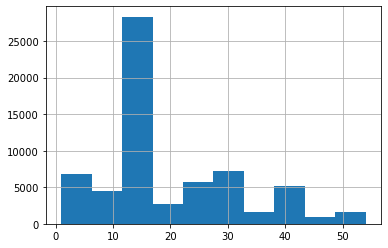

In [58]:
# Visualize up to the 75th percentile
user_encounter_counts[user_encounter_counts <= user_encounter_counts.quantile(0.75)].hist()

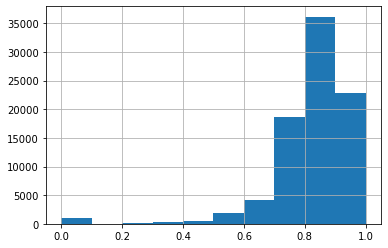

In [56]:
# What's the average percent correct for each user?
user_pct_correct = df_fe.groupby('user_id')['correct_response'].mean()
user_pct_correct.hist()

It looks like we have a few addicted users who've played thousands of games (some of which may be Transparent Language QA testers), but most users have encountered fewer than 50 items. It also looks like the majority of our user population gets a lot of questions right. What's the relationship between these two properties?

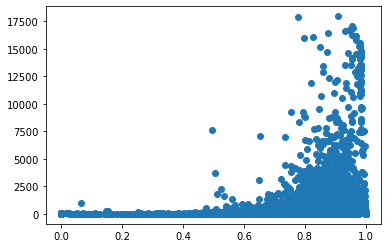

In [53]:
# Plot percent correct answers on X and number of first encounters on Y
plt.scatter(pct_correct, user_encounter_counts)

It looks like users who get more correct answers also have encountered more items. This makes sense. _Which Is English?_ is a game, so it makes sense that users who have some English skill would find it more enjoyable and play it more often; too much failure or too much cognitive burden can be unpleasant.

We'll have to keep this skew in mind as we proceed.

### Items

In [54]:
# How many first encounters have our items had?
item_encounter_counts = df_fe.groupby('item_id')['user_id'].count()
item_encounter_counts.describe()

count    18081.000000
mean       461.953100
std        272.779626
min          1.000000
25%        273.000000
50%        368.000000
75%        651.000000
max       1727.000000
Name: user_id, dtype: float64

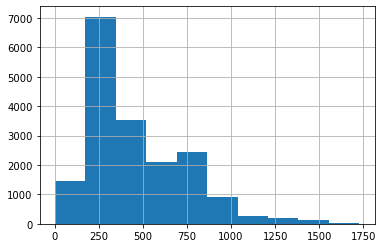

In [55]:
item_encounter_counts.hist()

In [60]:
# What's the average percent correct for each item?
item_pct_correct = df_fe.groupby('item_id')['correct_response'].mean()
item_pct_correct.describe()

count    18081.000000
mean         0.864093
std          0.092190
min          0.000000
25%          0.807087
50%          0.882038
75%          0.940030
max          1.000000
Name: correct_response, dtype: float64

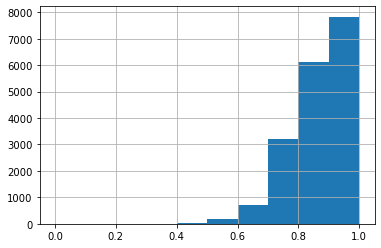

In [61]:
item_pct_correct.hist()

It looks like most items have fewer than 1000 first encounters. Also, if we consider the percent of correct answers to be an indication of how easy (or difficult) an item is, it looks like we have a much larger population of easy items than difficult items. But what's the relationship between encounter frequency and difficulty?

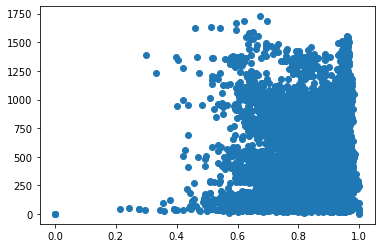

In [59]:
# Plot percent correct answers on X and number of first encounters on Y
plt.scatter(item_pct_correct, item_encounter_counts)

Something very important manifests itself in this data: notice that there are hardly any items that users get right less than 50% of the time. **This is due to the phenomenon of guessing.** For a multiple choice question, if the tester doesn't know the answer, they will guess and be correct $1 / n$ of the time, where $n$ is the number of options. In our case, $n = 2$, so $1 / 2 = 0.5$. _Only by outlying chance, helped by having a fewer number of first encounters, will an item be gotten correct less than 50% of the time._ This will be very important as we proceed to make the test.

That aside, it looks like encounters are healthily distributed among items of all difficulty levels.